In [1]:
pip install MiniSom

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("pca_client3_complete.csv")

In [3]:
df.shape

(2000121, 41)

In [4]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,0,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
1,1,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
2,2,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
3,3,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
4,4,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175


In [5]:
df = df.drop("Unnamed: 0",axis=1)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,-0.893086,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
1,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,-0.893086,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
2,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,-0.893086,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
3,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,-0.893086,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175
4,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,-0.893086,...,-0.392961,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175


In [7]:
df = np.array(df)

In [8]:
from minisom import MiniSom

In [84]:
SOM = MiniSom(27,27, 40, sigma=1, learning_rate=.01,neighborhood_function='gaussian',random_seed=50)

In [85]:
SOM.train_batch(df, 2000000, verbose=True)


 [ 2000000 / 2000000 ] 100% - 0:00:00 left 
 quantization error: 1.4253696640923252


In [86]:
som_shape = (27,27)

In [100]:
import pickle

In [102]:
som=pickle.dumps(SOM)

In [87]:
# each neuron represents a cluster
winner_coordinates = np.array([SOM.winner(x) for x in df]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [88]:
(np.unique(cluster_index))

array([  2,  12,  15,  19,  21,  22,  23,  25,  26,  44,  47,  48,  51,
        53,  65,  70,  73,  76,  77,  79,  80,  88,  95,  98, 101, 105,
       107, 111, 120, 128, 129, 131, 133, 134, 150, 153, 157, 159, 160,
       175, 176, 183, 184, 186, 188, 203, 205, 209, 210, 212, 213, 214,
       221, 224, 230, 231, 234, 237, 238, 239, 253, 254, 255, 258, 264,
       265, 266, 267, 269, 280, 281, 282, 285, 286, 287, 289, 291, 292,
       293, 295, 307, 313, 314, 315, 317, 318, 319, 320, 321, 323, 340,
       341, 342, 343, 344, 345, 347, 348, 359, 366, 367, 368, 369, 370,
       371, 375, 392, 393, 395, 396, 397, 398, 399, 402, 411, 417, 420,
       421, 422, 423, 424, 425, 426, 431, 434, 445, 446, 450, 451, 452,
       453, 454, 457, 458, 473, 474, 476, 477, 478, 479, 480, 482, 497,
       500, 502, 503, 504, 505, 506, 507, 512, 518, 521, 527, 528, 529,
       530, 532, 533, 536, 541, 551, 553, 555, 556, 558, 560, 561, 579,
       580, 581, 584, 585, 587, 588, 589, 590, 594, 598, 599, 60

C:\Users\PC 4\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


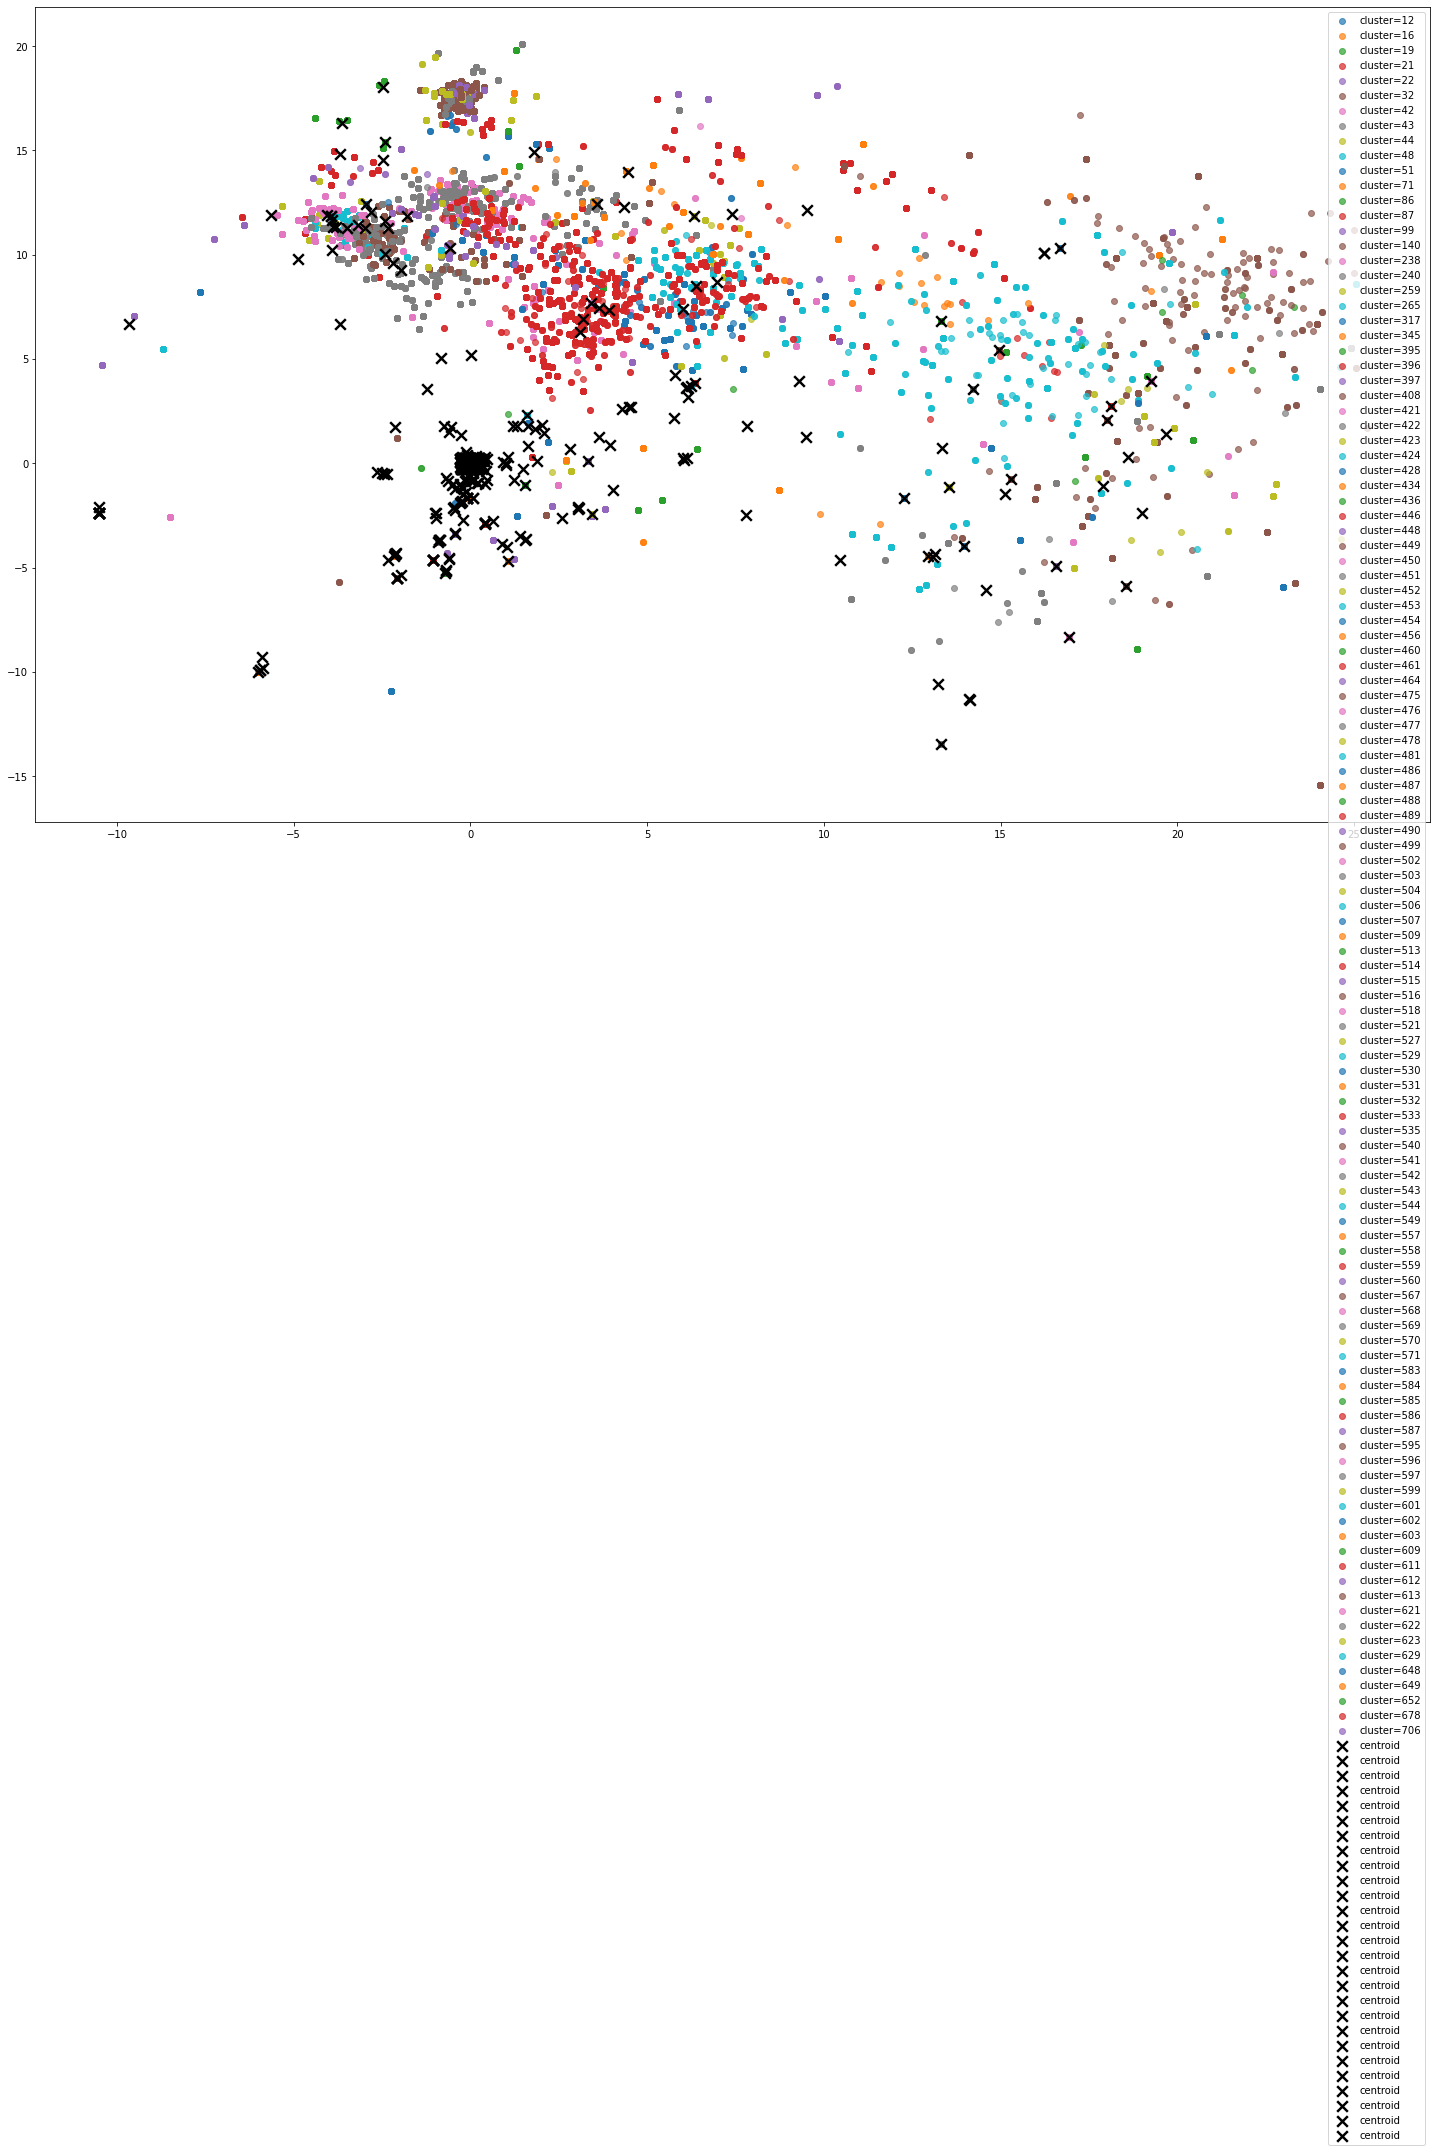

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,15))
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(df[cluster_index == c, 0],df[cluster_index == c, 1] ,label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in SOM.get_weights():
   plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',  s=3, linewidths=15, color='k', label='centroid')
plt.legend();

In [89]:
for i in np.unique(cluster_index):
 print("cluster no. - > ",i," = ",len(df[cluster_index==i])," templates")

cluster no. - >  2  =  475599  templates
cluster no. - >  12  =  14288  templates
cluster no. - >  15  =  17214  templates
cluster no. - >  19  =  8972  templates
cluster no. - >  21  =  10050  templates
cluster no. - >  22  =  9010  templates
cluster no. - >  23  =  4  templates
cluster no. - >  25  =  16  templates
cluster no. - >  26  =  5707  templates
cluster no. - >  44  =  5735  templates
cluster no. - >  47  =  14  templates
cluster no. - >  48  =  8241  templates
cluster no. - >  51  =  63975  templates
cluster no. - >  53  =  3  templates
cluster no. - >  65  =  1527  templates
cluster no. - >  70  =  2375  templates
cluster no. - >  73  =  5704  templates
cluster no. - >  76  =  5383  templates
cluster no. - >  77  =  4  templates
cluster no. - >  79  =  1  templates
cluster no. - >  80  =  17211  templates
cluster no. - >  88  =  95319  templates
cluster no. - >  95  =  8241  templates
cluster no. - >  98  =  9103  templates
cluster no. - >  101  =  21  templates
cluster no

In [136]:
arr=[]

In [138]:
for i in np.unique(cluster_index):
 if len(df[cluster_index==i]) < 10:
    arr.append(i)

In [139]:
arr

[23,
 53,
 77,
 79,
 107,
 133,
 157,
 175,
 176,
 203,
 210,
 212,
 224,
 258,
 266,
 295,
 342,
 348,
 359,
 473,
 505,
 518,
 556,
 599,
 661,
 693,
 722]

In [93]:
len(np.unique(cluster_index))

213

In [103]:
cluster_23 = pd.DataFrame(df[cluster_index==23])
a = 23*np.ones(len(cluster_23))
cluster_23["cluster_index"] = pd.Series(a)
cluster_23

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,cluster_index
0,13.904476,-3.597211,-3.351805,-7.298621,1.619376,-0.222699,-0.628977,-1.996578,-1.911657,-0.054679,...,-1.045002,-0.596922,0.071544,-4.544829,-1.241127,-0.446574,4.638739,4.694344,-2.221164,23.0
1,13.904476,-3.597211,-3.351805,-7.298621,1.619376,-0.222699,-0.628977,-1.996578,-1.911657,-0.054679,...,-1.045002,-0.596922,0.071544,-4.544829,-1.241127,-0.446574,4.638739,4.694344,-2.221164,23.0
2,13.904476,-3.597211,-3.351805,-7.298621,1.619376,-0.222699,-0.628977,-1.996578,-1.911657,-0.054679,...,-1.045002,-0.596922,0.071544,-4.544829,-1.241127,-0.446574,4.638739,4.694344,-2.221164,23.0
3,19.382098,-6.526055,-0.879636,-5.092622,0.115372,0.586274,0.127661,0.847566,-3.702434,1.435570,...,2.773322,0.048264,-0.787397,-2.559803,1.445179,0.187570,-1.139466,-0.078979,0.416342,23.0


In [106]:
new = pd.read_csv("pca_client3_complete.csv")

In [107]:
new["cluster_index"]=pd.Series(np.zeros(len(new)))

In [109]:
new.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,cluster_index
0,0,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175,0.0
1,1,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175,0.0
2,2,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175,0.0
3,3,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175,0.0
4,4,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.64395,0.153408,...,-0.351994,-1.024474,-2.28921,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175,0.0


In [128]:
cluster_index
new["cluster_index"] = pd.Series(cluster_index)

In [129]:
new

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,cluster_index
0,0,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.643950,0.153408,...,-0.351994,-1.024474,-2.289210,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175,553
1,1,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.643950,0.153408,...,-0.351994,-1.024474,-2.289210,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175,553
2,2,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.643950,0.153408,...,-0.351994,-1.024474,-2.289210,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175,553
3,3,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.643950,0.153408,...,-0.351994,-1.024474,-2.289210,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175,553
4,4,-3.287202,14.691245,5.366082,-2.609244,-4.642004,-0.942122,-2.203821,1.643950,0.153408,...,-0.351994,-1.024474,-2.289210,1.642763,0.564348,-0.052603,0.011404,-0.188851,0.008175,553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000116,1000116,24.043526,-15.422599,-15.674581,-2.874476,4.035269,1.955356,-0.642868,-0.921972,1.341549,...,-0.057491,0.102007,-0.005122,-0.016256,-0.018024,0.047400,-0.034931,-0.036791,-0.041766,51
2000117,1000117,24.043526,-15.422599,-15.674581,-2.874476,4.035269,1.955356,-0.642868,-0.921972,1.341549,...,-0.057491,0.102007,-0.005122,-0.016256,-0.018024,0.047400,-0.034931,-0.036791,-0.041766,51
2000118,1000118,24.043526,-15.422599,-15.674581,-2.874476,4.035269,1.955356,-0.642868,-0.921972,1.341549,...,-0.057491,0.102007,-0.005122,-0.016256,-0.018024,0.047400,-0.034931,-0.036791,-0.041766,51
2000119,1000119,-8.496780,-2.586686,0.726948,-0.330051,1.675823,0.307610,0.534646,0.929004,0.583438,...,0.038068,-0.012588,0.014597,0.011346,-0.046960,0.072272,0.046467,0.008504,0.020414,2


In [159]:
new.to_csv("encodings_with_cluster.csv")

In [157]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

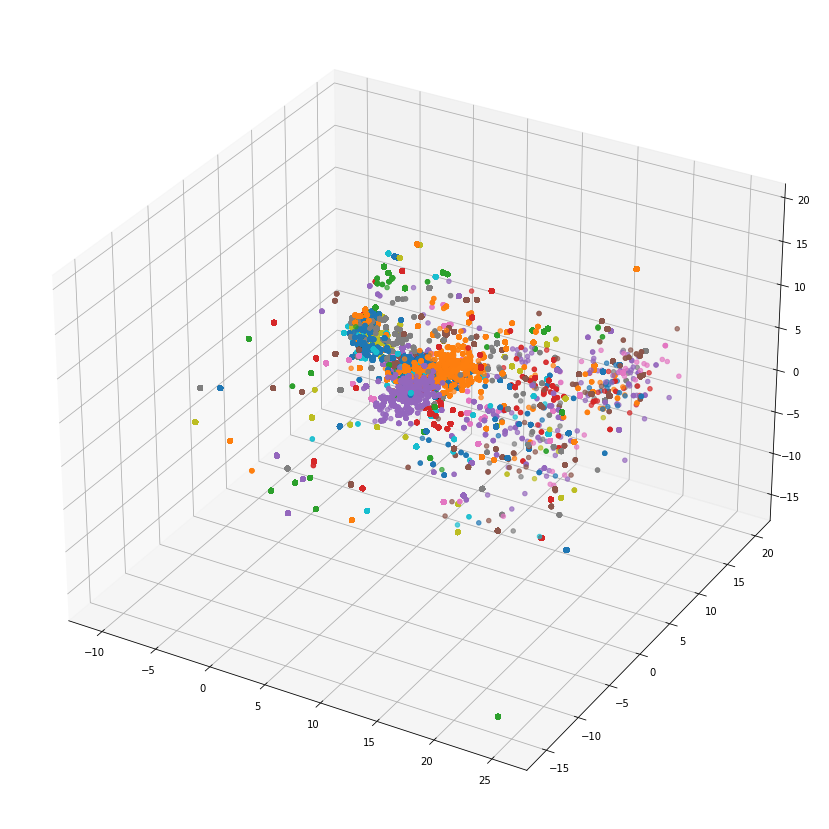

In [158]:
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111, projection='3d')
for c in np.unique(cluster_index):
  ax.scatter(df[cluster_index == c, 0],df[cluster_index == c, 1],df[cluster_index == c, 2],label='cluster='+str(c), alpha=.7)

In [133]:
p=new[new["cluster_index"]==23].drop(["Unnamed: 0"],axis=1)

anomaly_27=new[new["cluster_index"].isin(arr)]

anomaly_27

In [162]:
anomaly_27

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,cluster_index
220,220,13.211306,-4.799388,0.262584,-5.655938,2.628695,0.710850,-1.869944,-1.740780,-1.732537,...,-1.445116,1.559522,-0.911840,-1.515030,3.551277,-1.500983,2.837482,1.514504,-1.740468,176
224,224,-2.071718,1.198955,0.458285,0.652268,0.207555,1.601454,0.334868,-0.660186,-1.513498,...,2.435257,-2.496519,-0.883174,-0.908750,0.719491,-3.780865,1.016755,-1.017931,0.713683,359
227,227,13.211306,-4.799388,0.262584,-5.655938,2.628695,0.710850,-1.869944,-1.740780,-1.732537,...,-1.445116,1.559522,-0.911840,-1.515030,3.551277,-1.500983,2.837482,1.514504,-1.740468,176
239,239,15.636441,6.309419,3.226268,0.706306,1.806191,1.479548,-0.305762,-2.362149,-0.003586,...,0.606435,3.738669,6.947523,1.981977,0.135590,-1.332006,1.983041,2.934328,1.974153,693
250,250,19.517182,4.592215,-5.421296,-8.593173,0.784902,0.798905,-0.574438,1.677978,2.053945,...,-3.237224,-0.968416,-2.528575,-0.316665,0.179242,-0.909474,2.398032,3.155862,-1.538042,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829001,829001,18.146915,-0.697569,2.981499,-2.975416,3.342959,-1.689856,-0.404317,4.051255,-4.801500,...,0.133816,-1.449424,5.941676,0.585960,-2.789795,1.510890,-3.810542,2.736766,3.501006,212
1924281,924281,7.645423,11.750349,0.033166,0.266049,-2.151398,5.409864,0.105400,2.637947,-4.403822,...,0.683249,5.305407,1.329131,1.087441,-0.757740,3.056289,3.420709,-0.103372,1.526952,661
1983475,983475,17.071996,-5.013873,4.502711,3.393061,-11.829913,-2.450824,1.542144,-0.205171,-2.607266,...,-1.476746,2.760085,1.044936,-0.989037,1.745148,2.202558,3.551714,-2.670956,4.053369,348
1983495,983495,17.071996,-5.013873,4.502711,3.393061,-11.829913,-2.450824,1.542144,-0.205171,-2.607266,...,-1.476746,2.760085,1.044936,-0.989037,1.745148,2.202558,3.551714,-2.670956,4.053369,348


In [142]:
search=pd.read_csv("client_3_templates_structure.csv")

In [143]:
search["cluster_index"] = cluster_index

In [161]:
search.to_csv("templates_with_cluster.csv")

In [150]:
anomaly_27_27=search[search["cluster_index"].isin(arr)]

In [151]:
anomaly=pd.DataFrame([])

In [152]:
anomaly_27_27

,Unnamed: 0,seq_no,proc_id,nano_ts,Content,EventId,EventTemplate,ParameterList,cluster_index
220,1787844,220,loadgenerator,1649919303942485386,<head>,babd0daf,<head>,[],176
224,1787848,224,loadgenerator,1649919303942512101,<title>Hipster Coffee Shop</title>,e8403cc6,<*> Coffee <*>,"['title>Hipster', 'Shop</title']",359
227,1787851,227,loadgenerator,1649919303942531513,</head>,0efa13d1,</head>,[],176
239,1787863,239,loadgenerator,1649919303942641409,"""<option value=""""USD"""" selected=""""selected"""" >...",4078f519,"""<option value """"USD"""" selected """"selected"""" >...",[],693
250,1787874,250,loadgenerator,1649919303942761375,"""<main role=""""main"""">""",85073820,"""<main role """"main"""">""",[],77
...,...,...,...,...,...,...,...,...,...
1829001,1858491,1829114,loadgenerator,1649934251865890779,+ exit 1,75f4c9ad,+ exit 1,[],212
1924281,2000076,1924394,opsramp-k8s-agent,1649935953904477057,"""14-04-2022 11:32:33 [warning] [pid 17] [tid 2...",f9950fcc,"""14-04-2022 <*> 33 <*> [warning] [pid <*> [tid...","['11:32', '', '17]', '21]', '', '11:31:36', ''...",661
1983475,1861965,1983588,loadgenerator,1649937840016554669,<header>,cea964ac,<header>,[],348
1983495,1861985,1983608,loadgenerator,1649937840016725705,</header>,8d786e87,</header>,[],348


In [155]:
len(anomaly_27_27["EventId"].unique())

47

In [156]:
anomaly_27_27.to_csv("anomaly_27_27.csv")

In [164]:
anomaly_with_vectors_and_cluster=pd.concat([anomaly_27_27, anomaly_27], axis=1)

In [165]:
anomaly_with_vectors_and_cluster.to_csv("anomaly_with_vectors_and_cluster.csv")